## 데이터 내려받기 테스트

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ggoyadduya","key":"c66c40fdc5dc45eeff3338ffab2ff85f"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 4.97MB/s]


In [4]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## 간단한 합성곱 만들기

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape = (28, 28, 1)) # 입력층

# 합성곱 층, 처음 filters = 32 깊이 > 이후 더 깊어짐
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(inputs) # 함수형 API
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x) # 함수형 API
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x) # 함수형 API

# 출력층
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation = 'softmax')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

## MNIST 이미지 합성곱 훈련
- 2장의 연결 네트워크는 97.8%

In [7]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 16s 5ms/step - loss: 0.1661 - accuracy: 0.9481
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0449 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0303 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0225 - accuracy: 0.9934
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0181 - accuracy: 0.9941


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0253 - accuracy: 0.9917
0.9916999936103821


## 292 페이지
- 최대 풀링 층이 빠진 잘못된 구조의 합성곱
  + 가장 큰 문제점 : 이미지 압축이 안됨

In [9]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## 개와 고양이 이미지 다운로드
- 295 페이지

In [10]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:20<00:00, 38.8MB/s]
100% 812M/812M [00:20<00:00, 41.4MB/s]


In [11]:
!unzip --qq dogs-vs-cats.zip

In [12]:
!unzip -qq train.zip

## 데이터셋 만들기

In [13]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

## 모델 만들기

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape = (180, 180, 3)) # 180 X 180 크기의 RGB 이미지를 기대함
x = layers.Rescaling(1./255)(inputs) # 입력을 255로 나누어 [0, 1] 범위의 스케일 조정
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [15]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [16]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

## 데이터 전처리
- 301 페이지

In [17]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size = (180, 180),
    batch_size = 32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size = (180, 180),
    batch_size = 32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size = (180, 180),
    batch_size = 32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### 텐서플로 Dataset 객체 이해하기
- 샘플 데이터 1000개 만들기

In [18]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

- 하나의 샘플 확인하기

In [19]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


- 데이터 배치

In [20]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


- 원소 크기를 (16,) > (4, 4)

In [21]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


### Dataset이 반환하는 데이터 및 레이블 크기 확인

In [22]:
for data_batch, labels_batch in train_dataset:
  print('데이터 배치 크기 : ', data_batch.shape)
  print('레이블 배치 크기 : ', labels_batch.shape)
  break

데이터 배치 크기 :  (32, 180, 180, 3)
레이블 배치 크기 :  (32,)


## 모델 훈련하기

In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'convetn_from_scratch.keras',
        save_best_only = True, # 1epoch vs 2epoch
        monitor = 'val_loss'
    )
]

history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = validation_dataset,
    callbacks = callbacks
)

Epoch 1/30
63/63 [==============================] - 9s 84ms/step - loss: 0.7080 - accuracy: 0.5190 - val_loss: 0.6916 - val_accuracy: 0.5630
Epoch 2/30
63/63 [==============================] - 6s 88ms/step - loss: 0.6945 - accuracy: 0.5410 - val_loss: 0.6868 - val_accuracy: 0.5690
Epoch 3/30
63/63 [==============================] - 5s 70ms/step - loss: 0.6837 - accuracy: 0.5770 - val_loss: 0.6733 - val_accuracy: 0.5550
Epoch 4/30
63/63 [==============================] - 5s 70ms/step - loss: 0.6599 - accuracy: 0.6015 - val_loss: 0.6896 - val_accuracy: 0.5460
Epoch 5/30
63/63 [==============================] - 6s 88ms/step - loss: 0.6442 - accuracy: 0.6500 - val_loss: 0.6132 - val_accuracy: 0.6800
Epoch 6/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6099 - accuracy: 0.6760 - val_loss: 0.6082 - val_accuracy: 0.6590
Epoch 7/30
63/63 [==============================] - 6s 88ms/step - loss: 0.5848 - accuracy: 0.6900 - val_loss: 0.6119 - val_accuracy: 0.6850
Epoch 8/30
63

## 훈련 및 검증 데이터 과적합 확인

In [24]:
import matplotlib.pyplot as plt
def check_train_val_plot(history):
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(accuracy) + 1)
  fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
  ax[0].plot(epochs, accuracy, "bo", label="Training accuracy")
  ax[0].plot(epochs, val_accuracy, "b", label="Validation accuracy")
  ax[0].set_title("Training and validation accuracy")
  ax[0].legend()
  ax[1].plot(epochs, loss, "bo", label="Training loss")
  ax[1].plot(epochs, val_loss, "b", label="Validation loss")
  ax[1].set_title("Training and validation loss")
  ax[1].legend()
  plt.show()

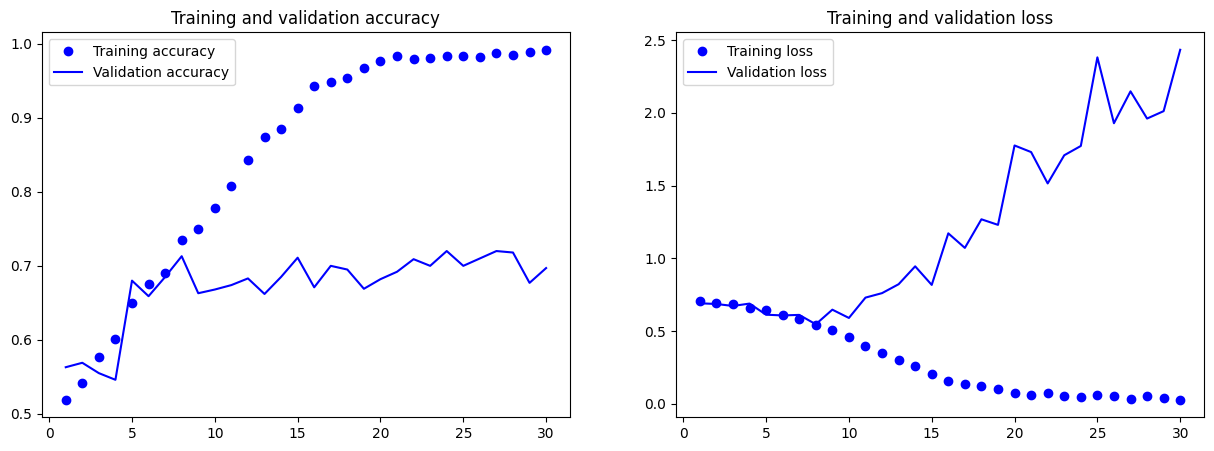

In [25]:
check_train_val_plot(history)

### 테스트 모델에서 모델 평가

In [26]:
test_model = keras.models.load_model('convetn_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}')

63/63 [==============================] - 4s 58ms/step - loss: 0.5760 - accuracy: 0.7010
테스트 정확도 : 0.701


## 데이터 증식 사용
- https://albumentations.ai/
- https://opencv.org/
- https://scikit-image.org/

In [27]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

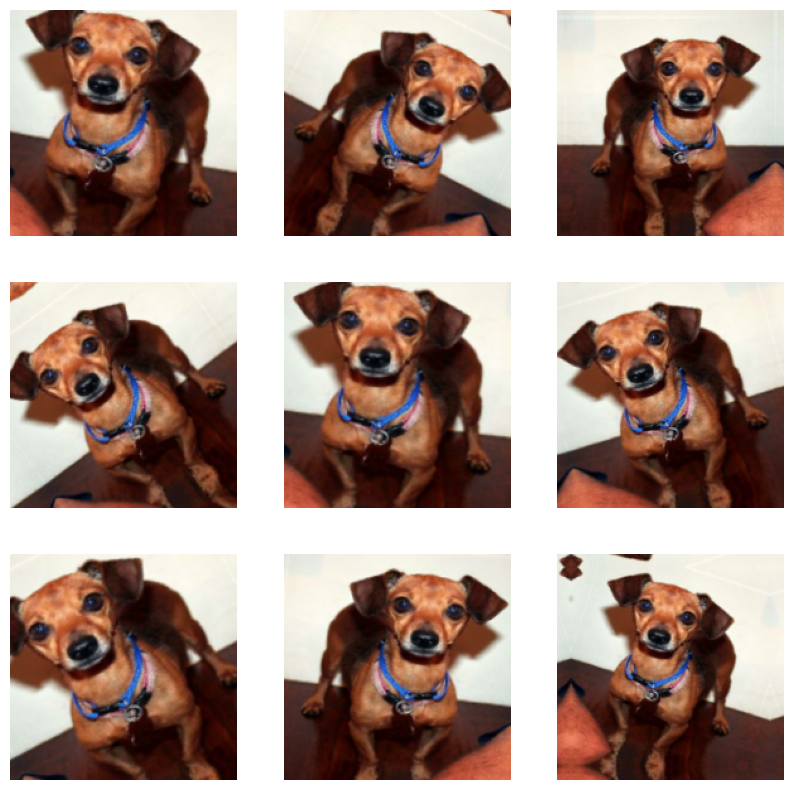

In [28]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [29]:
inputs = keras.Input(shape = (180, 180, 3)) # 입력층
x = data_augmentation(inputs) # 데이터 증식 단계 통과 시킴
x = layers.Rescaling(1./255)(x) # 이미지 [0, 1]

# 은닉층
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.5)(x) # 드롭아웃을 적용하면 과대적합이 덜 일어남

In [30]:
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [31]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [33]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'convetn_from_scratch_with_augmentation.keras',
        save_best_only = True, # 1epoch vs 2epoch
        monitor = 'val_loss'
    )
]

history = model.fit(
    train_dataset,
    epochs = 20,
    validation_data = validation_dataset,
    callbacks = callbacks
)

Epoch 1/20
63/63 [==============================] - 8s 121ms/step - loss: 0.6810 - accuracy: 0.5835 - val_loss: 0.6659 - val_accuracy: 0.5980
Epoch 2/20
63/63 [==============================] - 6s 92ms/step - loss: 0.6530 - accuracy: 0.6265 - val_loss: 0.7396 - val_accuracy: 0.5170
Epoch 3/20
63/63 [==============================] - 5s 72ms/step - loss: 0.6481 - accuracy: 0.6315 - val_loss: 0.6296 - val_accuracy: 0.6320
Epoch 4/20
63/63 [==============================] - 6s 85ms/step - loss: 0.6370 - accuracy: 0.6385 - val_loss: 0.6390 - val_accuracy: 0.6250
Epoch 5/20
63/63 [==============================] - 5s 71ms/step - loss: 0.6203 - accuracy: 0.6615 - val_loss: 0.6734 - val_accuracy: 0.5860
Epoch 6/20
63/63 [==============================] - 5s 70ms/step - loss: 0.6118 - accuracy: 0.6610 - val_loss: 0.8574 - val_accuracy: 0.5720
Epoch 7/20
63/63 [==============================] - 6s 92ms/step - loss: 0.5955 - accuracy: 0.6785 - val_loss: 0.7697 - val_accuracy: 0.5800
Epoch 8/20
6

## 테스트 세트에서 모델 정확도 확인

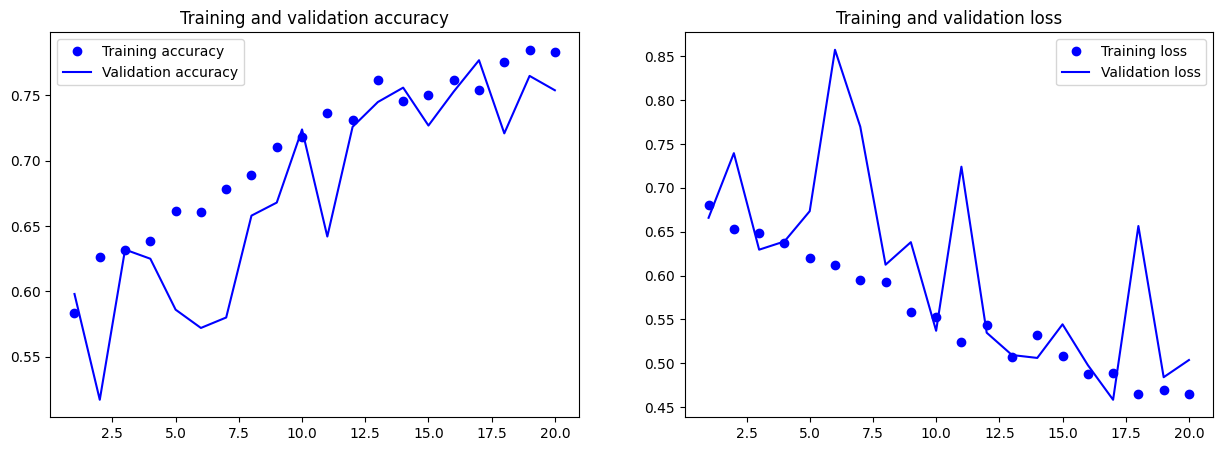

In [34]:
check_train_val_plot(history)

In [35]:
test_model = keras.models.load_model('convetn_from_scratch_with_augmentation.keras') # 저장된 모델 불러오기
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}')

63/63 [==============================] - 4s 60ms/step - loss: 0.5054 - accuracy: 0.7485
테스트 정확도 : 0.748


## 사전 훈련된 모델
- 일반 정확도 : 68.8
- 데이터 증식 정확도 : 84.1
- 사전 훈련된 모델 : 97.5
- 모델 미세 조정하기 : 98.5
- 결론 : 딥러닝 프로젝트.
  + 주요 키워드 >> 사전 훈련된 모델 & 모델 미세 조정하기
  chatgpt에 샘플코드 달라함 ㅋㅋㅋ

## 머신러닝 프로젝트 vs 딥러닝 프로젝트
- 머신러닝 프로젝트의 핵심은 정확도 + 변수 추출 과정 설명 중요
  + 데이터 분석가 지망생들이 많이 함

- 딥러닝 프로젝트의 핵심은 정확도 + 어떤 모델로 쓰는지. 모델에 대한 설명(영어 논문, 한글로 번역한 유튜브 공부)
  + 컴공 출신들이 많이 함

## 사전 훈련된 모델 활용
- pretrained model

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

- 312 페이지
- 훈련된 합성곱 기반층 (동결)
  + vgg16에서 정의된 구조를 그대로 이어받아서 사용한다
- ImageNet 데이터셋에서 훈련했다 >> 대용량 & 다양한 이미지를 학습했다.

In [37]:
# 2014년에 제안된 모델
conv_base = keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (180, 180, 3)
)

58889256/58889256 [==============================] - 2s 0us/step


In [38]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

### 특성 추출
- 데이터 증식을 사용하지 않는 특성 추출

In [39]:
# predict() 메서드 호출 넘파이 배열로 특성을 추출
def get_features_and_labels(dataset):
  all_features = [] # 각 특성
  all_labels = [] # 각 특성에 맞는 label
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)

  return np.concatenate(all_features), np.concatenate(all_labels)

In [40]:
from tensorflow.keras.utils import image_dataset_from_directory

new_base_dir = pathlib.Path('cats_vs_dogs_small')

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size = (180, 180),
    batch_size = 32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size = (180, 180),
    batch_size = 32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size = (180, 180),
    batch_size = 32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [41]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 29ms/step


In [42]:
train_features.shape, train_labels.shape

((2000, 5, 5, 512), (2000,))

In [43]:
val_features.shape, val_labels.shape

((1000, 5, 5, 512), (1000,))

In [44]:
test_features.shape, test_labels.shape

((2000, 5, 5, 512), (2000,))

In [45]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

img_path = keras.utils.get_file(
    fname="cat.jpg",
    origin="https://img-datasets.s3.amazonaws.com/cat.jpg")
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
features

1/1 [==============================] - 1s 890ms/step


array([[[[59.09735  ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [42.572563 ,  0.       ,  3.1530623, ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       , 18.166334 , ...,  0.       ,
           0.       ,  9.990405 ],
         ...,
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  4.5960965],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ]],

        [[30.416332 ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       , 21.980013 , ...,  0.       ,
           0.       ,  0.       ],
         [13.314047 ,  0.       ,  3.0975986, ...,  0.       ,
           0.       ,  0.       ],
         ...,
         [33.983784 ,  0.       ,  0.       , ..., 10.769696 ,
           0.       , 13.

### 출력층 정의하고 재훈련

In [48]:
# 상단에 vgg16 이 있고, 여기 출력층이 5, 5, 512
inputs = keras.Input(shape=(5, 5, 512)) #
x = layers.Flatten()(inputs) # Dense 특성 주입하기 전에 Flatten 층을 사용합니다.
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 5s 18ms/step - loss: 21.7748 - accuracy: 0.9170 - val_loss: 3.8450 - val_accuracy: 0.9730
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 2.2124 - accuracy: 0.9825 - val_loss: 13.8167 - val_accuracy: 0.9370
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.6199 - accuracy: 0.9865 - val_loss: 4.7348 - val_accuracy: 0.9720
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.7198 - accuracy: 0.9855 - val_loss: 4.6682 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.6846 - accuracy: 0.9895 - val_loss: 5.7843 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9175 - accuracy: 0.9920 - val_loss: 6.8301 - val_accuracy: 0.9780
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.4205 - accuracy: 0.9965 - val_loss: 7.0918 - val_accuracy: 0.9690
Epoch 8/20
63/63 

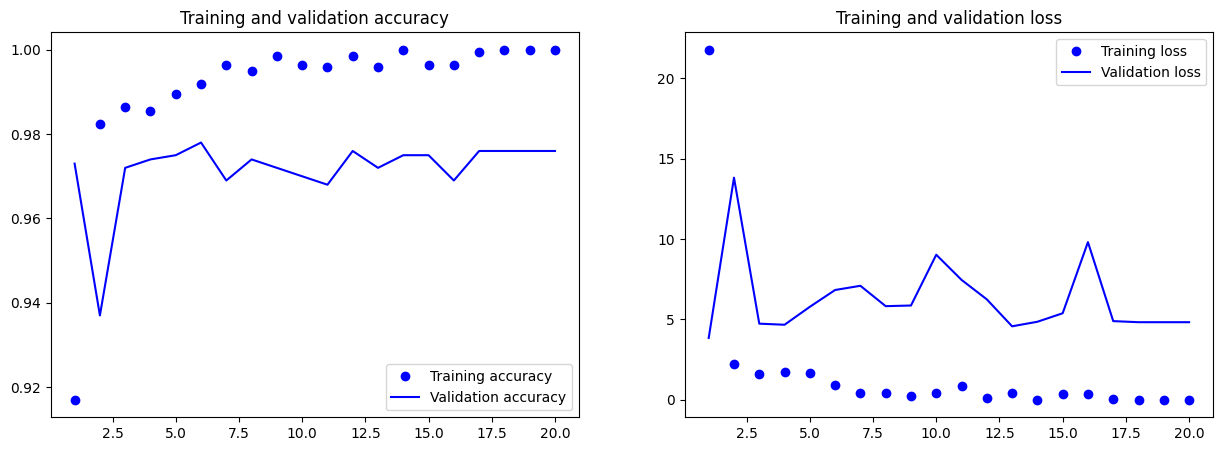

In [49]:
check_train_val_plot(history)

In [50]:
# 2014년에 제안된 모델
conv_base = keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (180, 180, 3)
)

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [51]:
conv_base = tf.keras.applications.ConvNeXtXLarge(
    weights = 'imagenet',
    include_top = False,
    input_shape = (180, 180, 3)
)

1393257616/1393257616 [==============================] - 42s 0us/step


In [52]:
conv_base.summary()

Model: "convnext_xlarge"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_xlarge_prestem_normal  (None, 180, 180, 3)  0          ['input_11[0][0]']               
 ization (Normalization)                                                                          
                                                                                                  
 convnext_xlarge_stem (Sequenti  (None, 45, 45, 256)  13056      ['convnext_xlarge_prestem_normali
 al)                                                             zation[0][0]']     

### 데이터 증식을 사용한 특성 추출

In [53]:
conv_base = keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top = False
)

In [54]:
conv_base.trainable = True
print(len(conv_base.trainable_weights)) # 동결 전


26


In [55]:
conv_base.trainable = False
print(len(conv_base.trainable_weights)) # 동결 전

0


- 데이터 증식
- 동결된 합성곱 기반층
- 밀집분류기

In [56]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape = (180, 180, 3))
x = data_augmentation(inputs)
x =  keras.applications.vgg16.preprocess_input(x) # 입력값의 스케일 조정

# 은닉층 = 합성곱 층 연결 (vgg16)
x = conv_base(x) # 합성곱 층 연결

# 출력층
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [57]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 30s 161ms/step - loss: 19.9643 - accuracy: 0.9035 - val_loss: 4.5591 - val_accuracy: 0.9630
Epoch 2/20
63/63 [==============================] - 10s 149ms/step - loss: 7.3762 - accuracy: 0.9405 - val_loss: 4.7968 - val_accuracy: 0.9710
Epoch 3/20
63/63 [==============================] - 10s 154ms/step - loss: 5.8388 - accuracy: 0.9520 - val_loss: 4.7111 - val_accuracy: 0.9710
Epoch 4/20
63/63 [==============================] - 10s 160ms/step - loss: 5.7015 - accuracy: 0.9585 - val_loss: 3.9434 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 10s 156ms/step - loss: 4.9000 - accuracy: 0.9645 - val_loss: 2.8460 - val_accuracy: 0.9780
Epoch 6/20
63/63 [==============================] - 9s 146ms/step - loss: 4.1083 - accuracy: 0.9655 - val_loss: 3.5468 - val_accuracy: 0.9800
Epoch 7/20
63/63 [==============================] - 10s 147ms/step - loss: 3.2449 - accuracy: 0.9675 - val_loss: 5.4873 - val_accuracy: 0.9690

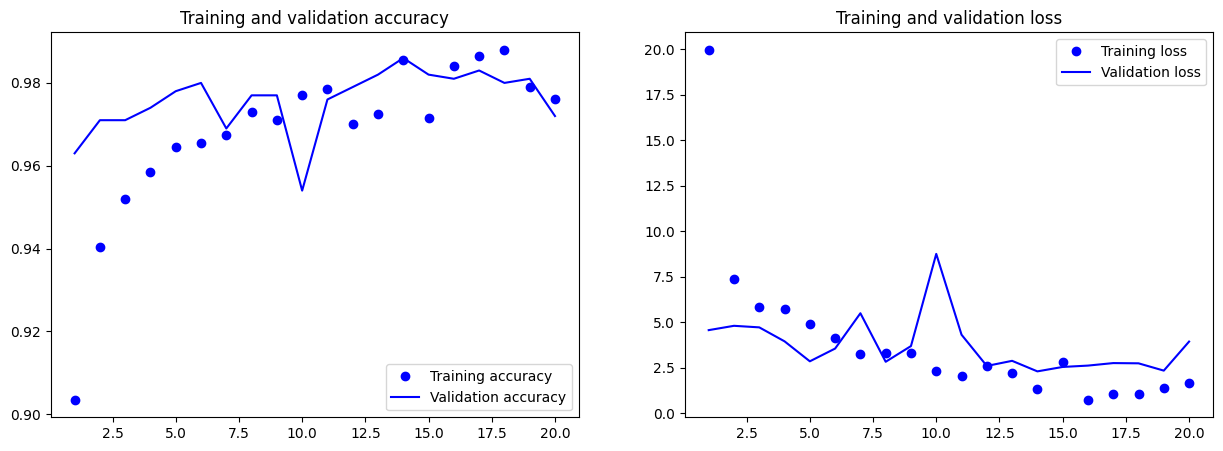

In [58]:
check_train_val_plot(history)

## 평가

In [59]:
test_model = keras.models.load_model(
    'feature_extraction_with_data_augmentation.keras'
)

test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3F}')

63/63 [==============================] - 6s 93ms/step - loss: 3.8907 - accuracy: 0.9765
테스트 정확도 : 0.976


## 미세 조정하기

In [60]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

- 마지막 3개의 합성곱 층 미세조정

In [61]:
conv_base.trainable = True # 동결 전
for layer in conv_base.layers[:-4]:
  layer.trainable = False # 동결 처음부터 ~ block4_pool 동결

In [62]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

'''
# 학습해야하는 마지막층 대충 학습하고 넘어감
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
'''

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 14s 177ms/step - loss: 0.6933 - accuracy: 0.9860 - val_loss: 2.4925 - val_accuracy: 0.9830
Epoch 2/30
63/63 [==============================] - 11s 170ms/step - loss: 0.8843 - accuracy: 0.9850 - val_loss: 1.6554 - val_accuracy: 0.9860
Epoch 3/30
63/63 [==============================] - 11s 168ms/step - loss: 0.5775 - accuracy: 0.9885 - val_loss: 1.7462 - val_accuracy: 0.9830
Epoch 4/30
63/63 [==============================] - 11s 169ms/step - loss: 0.5333 - accuracy: 0.9890 - val_loss: 1.7903 - val_accuracy: 0.9830
Epoch 5/30
63/63 [==============================] - 11s 171ms/step - loss: 0.4126 - accuracy: 0.9910 - val_loss: 1.8769 - val_accuracy: 0.9800
Epoch 6/30
63/63 [==============================] - 11s 166ms/step - loss: 0.4564 - accuracy: 0.9870 - val_loss: 1.7865 - val_accuracy: 0.9830
Epoch 7/30
63/63 [==============================] - 11s 170ms/step - loss: 0.2952 - accuracy: 0.9920 - val_loss: 1.6358 - val_accuracy: 0.9860

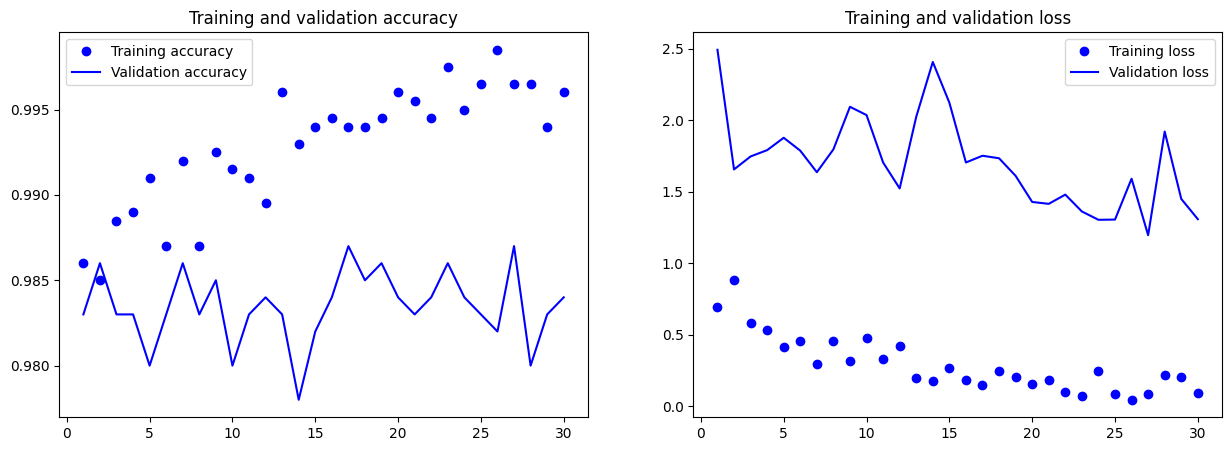

In [63]:
check_train_val_plot(history)

## 잔차 연결
- 344 페이지

In [4]:
# 필터 갯수가 변경되는 잔차 블록
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape = (82, 32, 3))
x = layers.Conv2D(32, 3, activation = 'relu')(inputs)

# 잔차 연결해주는 코드
residual = x # 잔차를 별도로 저장
x = layers.Conv2D(64, 3, activation = 'relu', padding = 'same')(x) # 다운 샘플링 안되도록 적용
residual = layers.Conv2D(64, 1)(residual)
x = layers.add([x, residual])

- 최대 풀링 층을 가진 잔차 블록

In [8]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)

def residual_block(x, filters, pooling=False):
    residual = x
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual)
    elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual)
    x = layers.add([x, residual])
    return x

x = residual_block(x, filters=32, pooling=True)
x = residual_block(x, filters=64, pooling=True)
x = residual_block(x, filters=128, pooling=False)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 32, 32, 3)    0           ['input_7[0][0]']                
                                                                                                  
 conv2d_14 (Conv2D)             (None, 32, 32, 32)   896         ['rescaling[0][0]']              
                                                                                                  
 conv2d_15 (Conv2D)             (None, 32, 32, 32)   9248        ['conv2d_14[0][0]']              
                                                                                              